<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [10]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. lambda0     : la deuxième composante du point de départ du Lagrangien
    5. mu0, tho    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * muks : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * lambdaks : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [11]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = false

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

Test Summary:            | Pass  Total  Time
Test lagrangien augmente |   12     12  2.9s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.

Les solutions trouvées sont très proches des solutions exactes. La valeur de $\lambda_k$
change de façon remarquable selon la fonction que l'on étudie, elle est d'environ 4.5 pour la fonction 1, alors on peut dire que les contraintes appliqués ne sont pas respectés tandis que pour la fonction 2 c'est de 0.03, c'est relativement mieux pour no contraintes. Pour $\mu_k$, elle est toujours très grande, alors on dit que la contrainte n'était pas respecté plusieurs fois
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
On remarque que pour certaines valeurs de $\tau$ le nombre d'itérations nécessaires diminuent considérablement, donc pour un bon choix de $\tau$ on peut aboutir au meilleur résultat à moins d'effort
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

Influance de tau sur la performance de l'algorithme

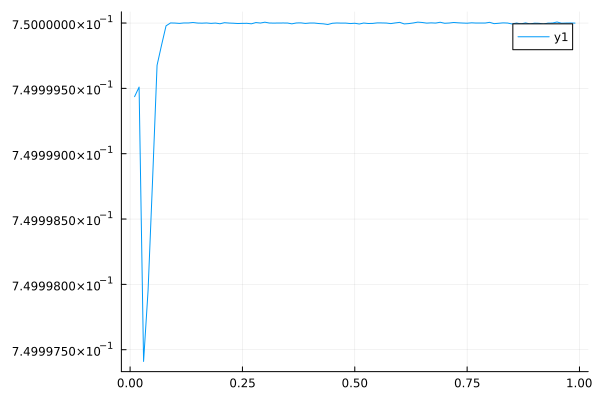

In [23]:
using Plots
options = [1e-2, 1e-5, 1000, 2, 100, 2]
algo = "gct"
print("Influance de tau sur la performance de l'algorithme")
tau = 0.01
options[6] = tau
epsilons = [] #la différence entre x_min et solution exacte
Nb_iters = []
taus = []
while tau < 1
    x_min, _, _, nb_iters = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x02,options)
    push!(epsilons, norm(sol_exacte_fct1-x_min))
    push!(Nb_iters, nb_iters)
    push!(taus, tau)
    tau = tau + 0.01
    options[6] = tau
end
#plot(taus, Nb_iters)
#plot(taus, Nb_iters, seriestype=:scatter)

plot(taus, epsilons)
#plot(taus, epsilons, seriestype=:scatter)